In [1]:
from sympy import symbols
from sympy.matrices import Matrix
from sympy import solve
from sympy import *

In [30]:
eva, uva, uvv, phi, a, theta, gam, A, K, I_h, N_h = symbols("epsilon^V_A, mu^V_A, mu^V_V, phi, a, theta, gamma, A, K, I_h ,N_h")

In [31]:
M = Matrix([[1-eva-uva, eva, 0, 0, uva],
           [theta*(1-A/K), 1-a*theta*I_h/N_h-uvv, a*theta*I_h/N_h, 0, uvv],
           [theta*(1-A/K), 0, 1-gam-uvv, gam, uvv],
           [theta*(1-A/K),0,0,1-uvv, uvv],
           [0,0,0,0,1]])

In [32]:
for i in range(5):
    print(sum(M[i,:]))

1
theta*(-A/K + 1) + 1
theta*(-A/K + 1) + 1
theta*(-A/K + 1) + 1
1


In [45]:
first_four = Matrix([M[0, :], M[1, :], M[2, :], M[3, :]])

In [46]:
M

⎡-ε_A__V - μ_A__V + 1         ε_A__V                 0             0       μ_A
⎢                                                                             
⎢      ⎛  A    ⎞         Iₕ⋅a⋅θ                   Iₕ⋅a⋅θ                      
⎢    θ⋅⎜- ─ + 1⎟       - ────── - μ_V__V + 1      ──────           0       μ_V
⎢      ⎝  K    ⎠           Nₕ                       Nₕ                        
⎢                                                                             
⎢      ⎛  A    ⎞                                                              
⎢    θ⋅⎜- ─ + 1⎟                 0            -γ - μ_V__V + 1      γ       μ_V
⎢      ⎝  K    ⎠                                                              
⎢                                                                             
⎢      ⎛  A    ⎞                                                              
⎢    θ⋅⎜- ─ + 1⎟                 0                   0         1 - μ_V__V  μ_V
⎢      ⎝  K    ⎠                                    

In [47]:
first_four

⎡-ε_A__V - μ_A__V + 1         ε_A__V                 0             0       μ_A
⎢                                                                             
⎢      ⎛  A    ⎞         Iₕ⋅a⋅θ                   Iₕ⋅a⋅θ                      
⎢    θ⋅⎜- ─ + 1⎟       - ────── - μ_V__V + 1      ──────           0       μ_V
⎢      ⎝  K    ⎠           Nₕ                       Nₕ                        
⎢                                                                             
⎢      ⎛  A    ⎞                                                              
⎢    θ⋅⎜- ─ + 1⎟                 0            -γ - μ_V__V + 1      γ       μ_V
⎢      ⎝  K    ⎠                                                              
⎢                                                                             
⎢      ⎛  A    ⎞                                                              
⎢    θ⋅⎜- ─ + 1⎟                 0                   0         1 - μ_V__V  μ_V
⎣      ⎝  K    ⎠                                    

In [48]:
S, E, I, D = symbols("S, E, I, D")

In [49]:
v = Matrix([[A,S,E,I]])

In [92]:
simplify((Matrix((first_four.T*v.T)[:-1])-v.T)[0])

In [91]:
Matrix((first_four.T*v.T)[:-1])-v.T

⎡                                   ⎛  A    ⎞       ⎛  A    ⎞       ⎛  A    ⎞⎤
⎢A⋅(-ε_A__V - μ_A__V + 1) - A + E⋅θ⋅⎜- ─ + 1⎟ + I⋅θ⋅⎜- ─ + 1⎟ + S⋅θ⋅⎜- ─ + 1⎟⎥
⎢                                   ⎝  K    ⎠       ⎝  K    ⎠       ⎝  K    ⎠⎥
⎢                                                                            ⎥
⎢                               ⎛  Iₕ⋅a⋅θ             ⎞                      ⎥
⎢                  A⋅ε_A__V + S⋅⎜- ────── - μ_V__V + 1⎟ - S                  ⎥
⎢                               ⎝    Nₕ               ⎠                      ⎥
⎢                                                                            ⎥
⎢                                               Iₕ⋅S⋅a⋅θ                     ⎥
⎢                     E⋅(-γ - μ_V__V + 1) - E + ────────                     ⎥
⎢                                                  Nₕ                        ⎥
⎢                                                                            ⎥
⎣                          E⋅γ + I⋅(1 - μ_V__V) - I 

In [78]:
sol = solve(Matrix((first_four.T*v.T)[:-1])-v.T, [A,S,E,I,D], dict=True)

In [79]:
init_printing()

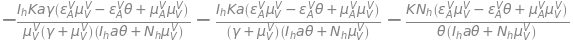

In [87]:
sol[1][E]+sol[1][I]+sol[1][S]

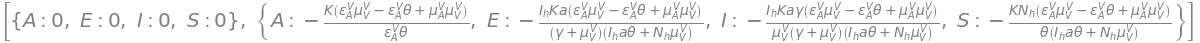

In [98]:
sol

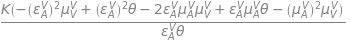

In [132]:
A_plus = simplify((theta*(1-A/K)*(sol[1][E]+sol[1][I]+sol[1][S])).subs({A:sol[1][A]}))
A_plus

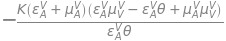

In [134]:
A_minus = simplify(sol[1][A]*(eva+uva))
A_minus

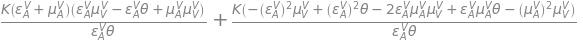

In [137]:
A_plus - A_minus

In [136]:
simplify(A_plus - A_minus)

In [111]:
values = {eva:0.12, uva:0.13213, uvv:0.3718927389, phi:3819, a:0.3123, theta:390123, gam:391203,
          K:381290391, I_h:3821903, N_h:3812903}
values_2 = {A:float(sol[1][A].subs(values)), E:float(sol[1][E].subs(values)), 
            S:float(sol[1][S].subs(values)), I:float(sol[1][I].subs(values))}

In [112]:
(Matrix((first_four.T*v.T)[:-1])-v.T).subs(values).subs(values_2)

⎡ 0.0103197733688489 ⎤
⎢                    ⎥
⎢         0          ⎥
⎢                    ⎥
⎢-7.45058059692383e-9⎥
⎢                    ⎥
⎣2.23517417907715e-8 ⎦